In [1]:
import pandas as pd
import numpy as np
import os
import seaborn as sns
import matplotlib.pyplot as plt


In [2]:
# data cleaning

In [3]:
os.listdir()

['.ipynb_checkpoints',
 'Airquality prediction second dataset.ipynb',
 'city_day.csv',
 'Untitled.ipynb']

In [4]:
df=pd.read_csv('city_day.csv')
df.head()

City        Date  PM2.5  PM10     NO    NO2    NOx  NH3     CO    SO2  \
0  Ahmedabad  2015-01-01    NaN   NaN   0.92  18.22  17.15  NaN   0.92  27.64   
1  Ahmedabad  2015-01-02    NaN   NaN   0.97  15.69  16.46  NaN   0.97  24.55   
2  Ahmedabad  2015-01-03    NaN   NaN  17.40  19.30  29.70  NaN  17.40  29.07   
3  Ahmedabad  2015-01-04    NaN   NaN   1.70  18.48  17.97  NaN   1.70  18.59   
4  Ahmedabad  2015-01-05    NaN   NaN  22.10  21.42  37.76  NaN  22.10  39.33   

       O3  Benzene  Toluene  Xylene  AQI AQI_Bucket  
0  133.36     0.00     0.02    0.00  NaN        NaN  
1   34.06     3.68     5.50    3.77  NaN        NaN  
2   30.70     6.80    16.40    2.25  NaN        NaN  
3   36.08     4.43    10.14    1.00  NaN        NaN  
4   39.31     7.01    18.89    2.78  NaN        NaN

In [5]:
df.isna().sum()

City              0
Date              0
PM2.5          4598
PM10          11140
NO             3582
NO2            3585
NOx            4185
NH3           10328
CO             2059
SO2            3854
O3             4022
Benzene        5623
Toluene        8041
Xylene        18109
AQI            4681
AQI_Bucket     4681
dtype: int64

In [6]:
df=df[df["AQI"].notna()]

In [7]:
pd.DataFrame(df[df["NH3"].notna()].isna().sum()).T

City  Date  PM2.5  PM10   NO  NO2   NOx  NH3   CO  SO2   O3  Benzene  \
0     0     0    502  2522  129  134  1047    0  335  356  436     2777   

   Toluene  Xylene  AQI  AQI_Bucket  
0     4426   11548    0           0

In [8]:
df=df[df["NH3"].notna()]

In [9]:
df=df.drop(["Xylene",'AQI_Bucket','City',"Date"],axis=1)

In [10]:
df.columns

Index(['PM2.5', 'PM10', 'NO', 'NO2', 'NOx', 'NH3', 'CO', 'SO2', 'O3',
       'Benzene', 'Toluene', 'AQI'],
      dtype='object')

In [11]:
for col in df:
    if df[col].isna().sum()>0:
        avg=df[col].sum()/len(df[col])
        df[col]=df[col].fillna(avg)
        print(f"{col}:{avg}")
        

PM2.5:57.10557606202905
PM10:100.65731243857158
NO:16.75478431800808
NO2:26.737661898001527
NOx:29.704778311674126
CO:1.1051638091077864
SO2:11.334998361908923
O3:33.373248880637775
Benzene:3.2121835754067924
Toluene:6.203459102326089


In [12]:
pd.DataFrame(df.isna().sum()).T

PM2.5  PM10  NO  NO2  NOx  NH3  CO  SO2  O3  Benzene  Toluene  AQI
0      0     0   0    0    0    0   0    0   0        0        0    0

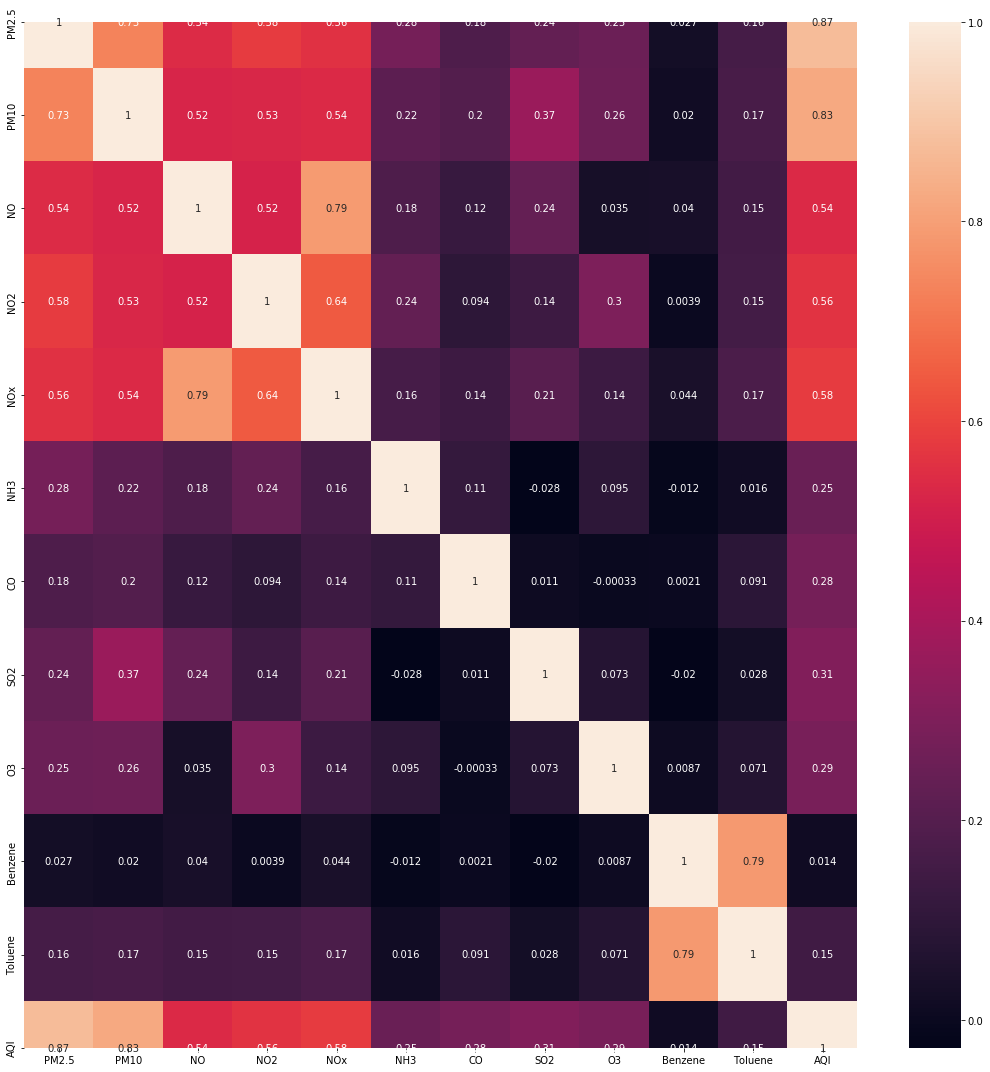

In [13]:
plt.figure(figsize=(15,15),)
sns.heatmap(df.corr(),annot=True)
plt.tight_layout()

In [14]:
df.drop("Benzene",axis=1,inplace=True)

In [15]:
df.head()

PM2.5   PM10    NO   NO2    NOx    NH3    CO   SO2     O3  Toluene   AQI
2010  31.21  38.66  7.20  1.27  10.65  25.63  0.56  4.22   2.81     0.08  52.0
2011  38.39  46.68  7.19  0.91  10.37  29.16  0.57  4.46   0.18     0.00  60.0
2012  43.23  50.83  7.14  1.07  10.48  28.95  0.57  4.53   0.41     0.00  62.0
2013  33.82  41.03  7.09  0.36   9.73  28.41  0.48  4.63   0.30     0.00  70.0
2014  27.14  35.04  5.63  2.32   8.09  23.98  0.50  4.71  13.02     0.68  54.0

In [16]:
df

PM2.5   PM10    NO    NO2    NOx    NH3    CO    SO2     O3    Toluene  \
2010   31.21  38.66  7.20   1.27  10.65  25.63  0.56   4.22   2.81   0.080000   
2011   38.39  46.68  7.19   0.91  10.37  29.16  0.57   4.46   0.18   0.000000   
2012   43.23  50.83  7.14   1.07  10.48  28.95  0.57   4.53   0.41   0.000000   
2013   33.82  41.03  7.09   0.36   9.73  28.41  0.48   4.63   0.30   0.000000   
2014   27.14  35.04  5.63   2.32   8.09  23.98  0.50   4.71  13.02   0.680000   
...      ...    ...   ...    ...    ...    ...   ...    ...    ...        ...   
29526  15.02  50.94  7.68  25.06  19.54  12.47  0.47   8.55  23.30  12.070000   
29527  24.38  74.09  3.42  26.06  16.53  11.99  0.52  12.72  30.14   2.210000   
29528  22.91  65.73  3.45  29.53  18.33  10.71  0.48   8.42  30.96   0.010000   
29529  16.64  49.97  4.05  29.26  18.80  10.03  0.52   9.84  28.30   0.000000   
29530  15.00  66.00  0.40  26.85  14.05   5.20  0.59   2.10  17.05   6.203459   

        AQI  
2010   52.0  
2011   60.0  
2012   62.0  
2013   70.0  
2014   54.0  
...     ...  
29526  41.0  
29527  70.0  
29528  68.0  
29529  54.0  
29530  50.0  

[18314 rows x 11 columns]

In [17]:
# modelling part 

In [18]:
from sklearn.preprocessing import StandardScaler 
from sklearn.model_selection import train_test_split

In [19]:
from sklearn.metrics import mean_squared_error,accuracy_score,explained_variance_score,r2_score


In [20]:
X=df.drop("AQI",axis=1)
y=df["AQI"]

In [21]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [22]:
X_train

PM2.5        PM10     NO    NO2    NOx    NH3        CO    SO2     O3  \
29117   45.00  113.400000   5.28   4.13   6.02   7.08  0.900000   7.43  23.34   
3981    42.01   80.460000  13.17   8.87  22.01  11.03  0.280000   5.79  24.41   
28284   93.11  149.800000  18.12  41.89  36.92  12.94  1.360000   9.69  39.06   
29112   56.23  171.440000   4.67  18.50  13.62  26.89  0.810000   3.73  36.53   
9272    98.35  100.657312   8.72  14.89  23.02  38.86  1.050000   8.50  32.88   
...       ...         ...    ...    ...    ...    ...       ...    ...    ...   
16800  105.77  225.040000  79.40  81.74  95.22  59.68  0.000000  15.60  30.72   
17480   67.26  154.120000  11.09  48.35  51.70  47.02  0.910000  13.15  46.30   
8324    57.20  100.657312   5.86  13.99  13.37  22.36  0.780000   4.96  32.60   
2982    29.77   59.980000   1.38   4.32   3.42   8.71  1.105164  20.53  32.28   
26428  113.96  439.840000  22.20   0.14  21.77   6.91  2.470000  30.65  12.79   

         Toluene  
29117   3.350000  
3981    1.120000  
28284  12.360000  
29112   4.140000  
9272    0.220000  
...          ...  
16800  19.860000  
17480  12.250000  
8324    4.710000  
2982    0.290000  
26428   6.203459  

[14651 rows x 10 columns]

In [23]:
X_test

PM2.5    PM10      NO    NO2     NOx     NH3    CO    SO2         O3  \
15975  56.02  130.40    4.14  46.30   27.61   10.69  0.50  19.41  41.620000   
10452  52.45   87.66   17.96  45.71  138.01   39.85  1.30   6.69  55.370000   
12242  58.31   85.47  125.14   7.95  133.09  103.20  1.20   3.54  33.373249   
23658  82.73  147.34   20.08  42.56   60.95   18.14  1.14  12.12  37.940000   
23824  15.18   52.48   16.39  10.89   27.10    3.29  0.29  10.33  18.870000   
...      ...     ...     ...    ...     ...     ...   ...    ...        ...   
25725  17.45   25.16    1.31   3.49    1.27    3.65  0.34   5.97  27.850000   
6365   76.82  193.01   25.39  49.59   47.02   19.67  1.25  11.55  84.680000   
16088  55.80  113.45    4.00  38.85   23.75   14.51  0.56   5.59  31.040000   
26661  24.15   62.87   22.48   8.45   30.93    7.38  1.03  36.23   0.500000   
25683  44.72  106.32   46.96  10.88   39.45    4.04  0.67   5.20  31.500000   

         Toluene  
15975  52.360000  
10452   6.550000  
12242   1.830000  
23658   6.203459  
23824   6.203459  
...          ...  
25725   0.170000  
6365    6.203459  
16088  11.390000  
26661   6.203459  
25683   3.800000  

[3663 rows x 10 columns]

In [24]:
ss=StandardScaler()

In [25]:
ss.fit(X_train)
X_train=ss.transform(X_train)
X_test=ss.transform(X_test)


In [26]:
from sklearn.linear_model import  LinearRegression


In [27]:
lr=LinearRegression()

In [28]:
lr.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [29]:
y_pred=lr.predict(X_test)

In [30]:
r2_score(y_test,y_pred)

0.8584861966547523

In [31]:
explained_variance_score(y_test,y_pred)*100

85.84916144847216

In [32]:
lr.predict(X_train[0].reshape(1,-1))

array([114.80473672])

In [33]:
y_train.values[0]

116.0

C:\Users\Win10\Anaconda3\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


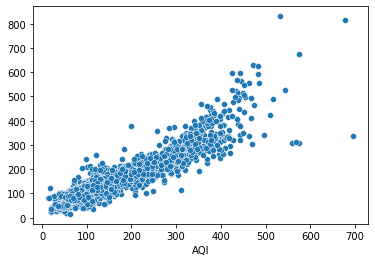

In [34]:
sns.scatterplot(y_test,y_pred);

C:\Users\Win10\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


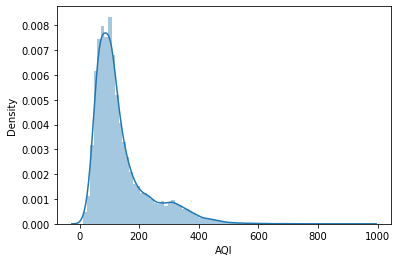

In [35]:
sns.distplot(df["AQI"],bins=80)

In [36]:
## random forest algorithm 

In [37]:
from sklearn.ensemble import RandomForestRegressor

In [38]:
rr=RandomForestRegressor()

In [39]:
rr.fit (X_train,y_train)

C:\Users\Win10\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
                      max_features='auto', max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, n_estimators=10,
                      n_jobs=None, oob_score=False, random_state=None,
                      verbose=0, warm_start=False)

In [40]:
y_pred=rr.predict(X_test)

In [41]:
r2_score(y_pred,y_test)

0.9153738189307905

In [42]:
explained_variance_score(y_test,y_pred)*100

91.9938144290117

C:\Users\Win10\Anaconda3\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


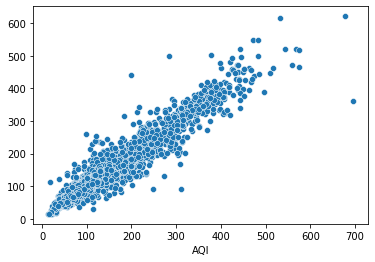

In [43]:
sns.scatterplot(y_test,y_pred)

C:\Users\Win10\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


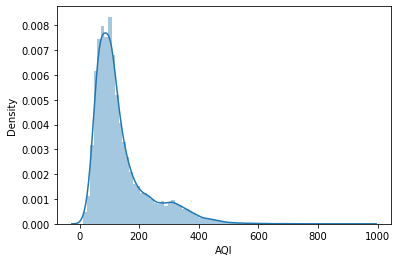

In [44]:
sns.distplot(df["AQI"],bins=80)

In [45]:
##Gaussian naive bayes algorithm 

In [46]:
from sklearn.naive_bayes import GaussianNB

In [47]:
gb=GaussianNB()

In [48]:
gb.fit(X_train,y_train)

GaussianNB(priors=None, var_smoothing=1e-09)

In [49]:
y_pred=gb.predict(X_test)

In [50]:
r2_score(y_pred,y_test)

0.7798122070194445

In [51]:
explained_variance_score(y_test,y_pred)*100

79.21057809125791

C:\Users\Win10\Anaconda3\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


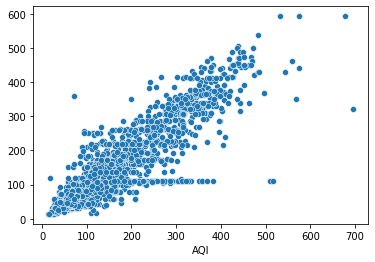

In [52]:
sns.scatterplot(y_test,y_pred)

C:\Users\Win10\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


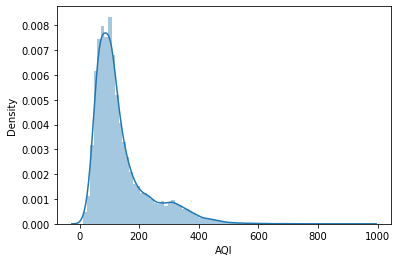

In [53]:
sns.distplot(df["AQI"],bins=80)

<h1>Single Prediction</h1>

In [54]:
lr.predict(X_train[0].reshape(1,-1))[0]

114.80473671521234

In [55]:
y_train.values[0]

116.0

In [56]:
def prediction(data,scaler,model):
    scaled_data = scaler.transform(data)
    prediction = model.predict(scaled_data)
    return prediction[0]

In [57]:
X.head(1)

PM2.5   PM10   NO   NO2    NOx    NH3    CO   SO2    O3  Toluene
2010  31.21  38.66  7.2  1.27  10.65  25.63  0.56  4.22  2.81     0.08

In [58]:
prediction(X.iloc[1].values.reshape(1,-1),ss,lr)

76.17257045281052

In [59]:
y.values[1]

60.0

In [64]:
actual_result = []
predicted_result = []
for i in range(len(X_test)):
    idx = np.random.randint(0,18314)
    predicted_value = prediction(X.iloc[idx].values.reshape(1,-1),ss,gb)
    predicted_value = predict_class(predicted_value)
    actual_value = predict_class(y.values[idx])
    print("{} : {}\n".format(actual_value,predicted_value))
    actual_result.append(actual_value)
    predicted_result.append(predicted_value)

print("Total Predictions : ",len(predicted_result))
print("Correct Predictions : ",np.sum(np.array(actual_result) == np.array(predicted_result)))

Moderate : Moderate

Moderate : Good

Severe : Severe

Moderate : Moderate

Moderate : Moderate

Severe : Severe

Moderate : Good

Severe : Severe

Moderate : Good

Severe : Severe

Moderate : Moderate

Moderate : Good

Moderate : Moderate

Moderate : Moderate

Good : Good

Moderate : Moderate

Severe : Moderate

Moderate : Good

Severe : Severe

Severe : Severe

Severe : Severe

Moderate : Moderate

Moderate : Good

Severe : Severe

Moderate : Good

Moderate : Moderate

Moderate : Good

Severe : Severe

Moderate : Severe

Severe : Severe

Severe : Severe

Moderate : Moderate

Moderate : Moderate

Moderate : Good

Moderate : Moderate

Moderate : Moderate

Moderate : Moderate

Moderate : Good

Moderate : Moderate

Moderate : Severe

Good : Good

Severe : Severe

Moderate : Good

Good : Good

Severe : Severe

Moderate : Moderate

Moderate : Moderate

Moderate : Moderate

Moderate : Moderate

Moderate : Moderate

Good : Good

Severe : Severe

Moderate : Moderate

Severe : Moderate

Modera

Severe : Severe

Severe : Severe

Severe : Severe

Severe : Severe

Severe : Severe

Good : Moderate

Severe : Severe

Moderate : Good

Moderate : Moderate

Good : Good

Moderate : Good

Moderate : Moderate

Moderate : Moderate

Moderate : Moderate

Moderate : Moderate

Moderate : Good

Severe : Severe

Moderate : Moderate

Moderate : Moderate

Severe : Severe

Moderate : Moderate

Severe : Moderate

Severe : Moderate

Good : Good

Moderate : Moderate

Moderate : Moderate

Moderate : Moderate

Moderate : Good

Severe : Severe

Moderate : Severe

Moderate : Moderate

Severe : Severe

Severe : Severe

Moderate : Severe

Moderate : Good

Severe : Moderate

Moderate : Severe

Severe : Severe

Severe : Severe

Severe : Severe

Severe : Severe

Moderate : Moderate

Moderate : Moderate

Severe : Moderate

Moderate : Moderate

Severe : Severe

Moderate : Moderate

Severe : Severe

Severe : Severe

Severe : Severe

Moderate : Moderate

Moderate : Moderate

Moderate : Moderate

Moderate : Good



Severe : Severe

Moderate : Moderate

Moderate : Moderate

Severe : Severe

Severe : Severe

Moderate : Moderate

Moderate : Moderate

Moderate : Good

Severe : Moderate

Good : Moderate

Severe : Severe

Moderate : Moderate

Severe : Moderate

Severe : Severe

Moderate : Moderate

Moderate : Moderate

Severe : Severe

Moderate : Moderate

Moderate : Moderate

Moderate : Moderate

Moderate : Moderate

Moderate : Moderate

Severe : Severe

Moderate : Severe

Moderate : Moderate

Severe : Severe

Moderate : Moderate

Severe : Severe

Moderate : Moderate

Moderate : Moderate

Good : Good

Moderate : Severe

Moderate : Good

Moderate : Severe

Moderate : Severe

Moderate : Moderate

Moderate : Moderate

Moderate : Moderate

Moderate : Moderate

Severe : Severe

Severe : Severe

Severe : Severe

Moderate : Moderate

Moderate : Moderate

Moderate : Moderate

Moderate : Good

Moderate : Good

Moderate : Moderate

Severe : Severe

Good : Good

Severe : Severe

Severe : Severe

Moderate : Moder

Severe : Severe

Moderate : Severe

Good : Moderate

Moderate : Good

Moderate : Moderate

Moderate : Good

Moderate : Good

Moderate : Moderate

Moderate : Good

Severe : Severe

Moderate : Good

Severe : Severe

Severe : Moderate

Moderate : Moderate

Severe : Severe

Good : Moderate

Severe : Severe

Severe : Severe

Moderate : Good

Moderate : Severe

Moderate : Moderate

Moderate : Moderate

Severe : Severe

Moderate : Severe

Good : Good

Moderate : Moderate

Severe : Moderate

Moderate : Moderate

Moderate : Good

Moderate : Moderate

Moderate : Moderate

Moderate : Moderate

Severe : Severe

Moderate : Moderate

Moderate : Moderate

Moderate : Moderate

Moderate : Moderate

Good : Good

Moderate : Moderate

Moderate : Severe

Severe : Severe

Moderate : Moderate

Good : Good

Moderate : Moderate

Severe : Severe

Severe : Moderate

Moderate : Moderate

Moderate : Moderate

Moderate : Moderate

Moderate : Good

Severe : Severe

Severe : Severe

Moderate : Moderate

Severe : Seve

Moderate : Moderate

Moderate : Moderate

Moderate : Moderate

Severe : Severe

Severe : Severe

Moderate : Moderate

Moderate : Moderate

Moderate : Moderate

Good : Good

Severe : Moderate

Severe : Severe

Moderate : Moderate

Moderate : Moderate

Moderate : Moderate

Moderate : Good

Severe : Severe

Severe : Moderate

Moderate : Moderate

Moderate : Moderate

Severe : Severe

Moderate : Moderate

Moderate : Good

Moderate : Moderate

Moderate : Moderate

Moderate : Good

Moderate : Moderate

Severe : Severe

Severe : Severe

Severe : Severe

Moderate : Severe

Moderate : Moderate

Moderate : Moderate

Moderate : Good

Moderate : Good

Moderate : Moderate

Moderate : Good

Moderate : Moderate

Moderate : Moderate

Moderate : Moderate

Moderate : Severe

Moderate : Moderate

Severe : Severe

Moderate : Moderate

Good : Good

Severe : Severe

Moderate : Severe

Moderate : Moderate

Severe : Severe

Moderate : Moderate

Moderate : Moderate

Severe : Moderate

Severe : Severe

Moderate

Moderate : Good

Severe : Moderate

Moderate : Moderate

Moderate : Moderate

Moderate : Moderate

Moderate : Good

Moderate : Moderate

Moderate : Moderate

Moderate : Severe

Good : Good

Severe : Severe

Moderate : Good

Moderate : Moderate

Severe : Severe

Moderate : Moderate

Good : Good

Severe : Severe

Good : Good

Moderate : Moderate

Severe : Severe

Moderate : Moderate

Moderate : Moderate

Moderate : Moderate

Moderate : Moderate

Moderate : Moderate

Moderate : Moderate

Moderate : Good

Moderate : Severe

Moderate : Good

Good : Moderate

Severe : Severe

Severe : Severe

Moderate : Moderate

Severe : Severe

Moderate : Moderate

Severe : Severe

Severe : Severe

Moderate : Moderate

Moderate : Good

Moderate : Moderate

Moderate : Moderate

Moderate : Moderate

Severe : Moderate

Severe : Severe

Moderate : Good

Good : Good

Severe : Severe

Moderate : Moderate

Severe : Severe

Severe : Severe

Moderate : Moderate

Severe : Moderate

Moderate : Moderate

Severe : Seve

Moderate : Moderate

Moderate : Severe

Good : Good

Moderate : Moderate

Severe : Moderate

Moderate : Moderate

Moderate : Moderate

Moderate : Moderate

Severe : Severe

Moderate : Moderate

Moderate : Moderate

Moderate : Moderate

Severe : Moderate

Moderate : Good

Moderate : Moderate

Severe : Severe

Moderate : Moderate

Moderate : Moderate

Moderate : Severe

Severe : Severe

Moderate : Moderate

Moderate : Severe

Moderate : Severe

Severe : Severe

Moderate : Moderate

Moderate : Moderate

Severe : Severe

Severe : Severe

Moderate : Moderate

Severe : Severe

Severe : Severe

Severe : Moderate

Moderate : Good

Severe : Severe

Moderate : Moderate

Good : Good

Moderate : Moderate

Severe : Severe

Moderate : Moderate

Severe : Severe

Severe : Severe

Good : Good

Severe : Moderate

Moderate : Moderate

Severe : Severe

Moderate : Moderate

Moderate : Moderate

Moderate : Moderate

Severe : Moderate

Severe : Severe

Moderate : Moderate

Moderate : Moderate

Severe : Moder

Severe : Moderate

Severe : Moderate

Moderate : Moderate

Severe : Moderate

Moderate : Good

Moderate : Moderate

Moderate : Moderate

Moderate : Severe

Moderate : Good

Moderate : Moderate

Moderate : Moderate

Moderate : Good

Moderate : Moderate

Severe : Severe

Moderate : Moderate

Moderate : Moderate

Moderate : Moderate

Moderate : Moderate

Good : Moderate

Severe : Severe

Moderate : Moderate

Severe : Severe

Moderate : Good

Moderate : Moderate

Severe : Severe

Moderate : Moderate

Moderate : Good

Severe : Moderate

Severe : Moderate

Moderate : Moderate

Moderate : Moderate

Moderate : Moderate

Severe : Severe

Severe : Severe

Severe : Severe

Severe : Severe

Moderate : Good

Severe : Severe

Moderate : Moderate

Moderate : Good

Moderate : Severe

Moderate : Good

Moderate : Moderate

Moderate : Moderate

Moderate : Moderate

Moderate : Moderate

Severe : Severe

Moderate : Moderate

Moderate : Moderate

Moderate : Moderate

Severe : Moderate

Severe : Severe

Good

Moderate : Severe

Moderate : Moderate

Severe : Severe

Moderate : Moderate

Severe : Moderate

Severe : Severe

Moderate : Moderate

Moderate : Moderate

Moderate : Moderate

Severe : Severe

Moderate : Moderate

Severe : Severe

Moderate : Severe

Moderate : Moderate

Severe : Moderate

Moderate : Moderate

Moderate : Moderate

Severe : Severe

Severe : Severe

Moderate : Moderate

Moderate : Good

Severe : Severe

Moderate : Moderate

Moderate : Severe

Moderate : Moderate

Moderate : Severe

Moderate : Moderate

Good : Good

Severe : Severe

Moderate : Moderate

Moderate : Moderate

Moderate : Moderate

Severe : Severe

Moderate : Good

Moderate : Moderate

Moderate : Moderate

Moderate : Moderate

Good : Good

Severe : Severe

Severe : Severe

Moderate : Good

Good : Good

Moderate : Moderate

Severe : Moderate

Moderate : Good

Moderate : Moderate

Severe : Moderate

Moderate : Good

Moderate : Moderate

Moderate : Moderate

Moderate : Good

Moderate : Moderate

Moderate : Moder

In [ ]:
# 0-50 (Good) , 50-150(Moderate), 150(Severe)

In [62]:
def predict_class(aqi):
    if (aqi<51):
        return "Good"
    elif (aqi>50 and aqi<151):
        return "Moderate"
    else:
        return "Severe"